
# Project: Relationship Between CO2 Emission and GDP

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

CO2 emission of a country or an economy is thought to be linked closely to gross domestic product (GDP) according to various sources. What is unknown however, is how exactly the correlation between the two develops over the course of the development of that economy.

One hypothesis is, that during the development of an economy, the environmental damage follows an inverted U-shape, when drawn versus GDP per capita (i.e. per person). This curve is also known as the [Environmental Kuznets Curve](https://en.wikipedia.org/wiki/Kuznets_curve#Environmental_Kuznets_curve). Economist Simon Kuznets hypothesized in the 50s and 60s, that market forces first increase and later decrease econimic inequality, when an economy develops. This concept was later applied to environmental damage and found valid e.g. for sulfur dioxide.
![EKC](./data/Environmental_Kuznets_Curve.png)

**Source:**[Wikipedia: Kuznets Curve](https://en.wikipedia.org/wiki/Kuznets_curve)

The research question that shall be answered during the course of this study is:

**Does the CO2 emission per capita versus GDP per capita follow the Environmental Kuznets Curve?**

In order to answer this question, the following steps have been undertaken:
1. determine the development of CO2 emissions per capita and GDP per capita over time for groups of countries, representing highly developed, medium developed and less developed economies
2. determine the correlation of CO2 emission per capita and GDP per capita seperately for these groups of economies
3. determine outliers and find possible causes using data
4. (Optional) Determine, if there is a strong correlation with some other indictor clearly not linked to the CO2 emission in order to demonstrate the difference between correlation and causality

**Note:** Countries will be counted as highly developed, when their HDI is above or equal to 0.8 (very high HDI acc. to UN). Below an HDI of 0.8, but above 0.5, countries are counted as medium for the purpose of this exercise (high/medium HDI acc. to UN) and below 0.5, countries are considered having a low HDI.

**Source:** [Wikipedia: Human Development Index](https://en.wikipedia.org/wiki/Human_Development_Index)

In [115]:
# in this cell, all packages used throughout this study are imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, the data sets to be used are loaded in data frames and a first exploration is done using pandas. The data is cleaned and joint data sets are created in order to ease the visualization later on.

The data sets used in this study are the following:

- `indicator CDIAC carbon_dioxide_emissions_per_capita.csv` - Average CO2 emission in metric tons per person during the given year, calculated from deviding the total CO2 with the total population of the countries.
- `GDPpercapitaconstant2000US.csv` - Gross Domestic Product per capita in constant 2000 US$. The inflation but not the differences in the cost of living between countries has been taken into account.

**Data Source:** [www.gapminder.org](https://www.gapminder.org/)

**Note:** The data format of the gapminder data sets was ".xls". All data sets were saved as ".csv" using "," as delimiter and "." as decimal point. Only the first sheet of each workbook was used.

### General Properties

In [31]:
# load all data sets using pandas read_csv method
path = './data/'
co2_per_person = pd.read_csv(path + 'indicator CDIAC carbon_dioxide_emissions_per_capita.csv')
gdp_per_person = pd.read_csv(path + 'GDPpercapitaconstant2000US.csv')
hdi = pd.read_csv(path + 'Indicator_HDI.csv')

### Load data, add indexes and drop NaNs
Data cleaning steps in this section include resetting of the indices, removal of rows and columns containing too many NaNs and reorganising the datasets, so they can be used for further analysis and visualization.

#### Dependant Variable - CO2 per Capita

In [32]:
# clean dependant variable data set containing CO2 emissions per capita for a number of countries worldwide 
# for the years 1751 through 2012
co2_per_person = co2_per_person.set_index('CO2 per capita')

# drop all rows and columns containing only nulls
co2_per_person = co2_per_person.dropna(axis=1, how='all')
co2_per_person = co2_per_person.dropna(axis=0, how='all')

# retrieval of some statistical values about the data set in order to get a feeling for the distribution of the data
co2_per_person.describe()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,200.000000,200.000000,200.000000,200.000000,201.000000,201.000000,201.000000,201.000000,65.000000,65.000000
mean,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,5.160597,5.266567,5.242741,5.250673,5.387444,5.293425,5.064836,5.189779,8.395975,8.391032
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.892710,7.222377,7.198735,6.950140,7.281876,6.858804,6.479270,6.538857,7.796528,8.041490
min,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.022704,0.027472,0.021237,0.025019,0.003482,0.008618,0.011942,0.008443,0.401268,0.426003
25%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.610230,0.682390,0.730938,0.681245,0.645242,0.613104,0.609647,0.640119,4.196912,4.141014
50%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,3.216404,3.242589,3.302545,3.301199,3.164370,3.277726,3.106366,3.263605,6.722385,6.506759
75%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,7.514300,7.530032,7.296806,7.463160,7.555909,7.293089,6.782996,6.983513,9.513115,9.194220
max,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,55.322622,62.069377,63.187436,57.986895,57.066817,48.702062,41.378843,40.098333,41.220928,46.643197


A lot of columns contain only one or very few values. Therefore no statistical conclusions can be drawn from these columns.

However, the data of one country, the United Kingdom, will be used to show an example of the development of CO2 emission of a country when developing from an agricultural economy (in 1751) to an industrialized economy (starting around 1800) and later to a service oriented economy.

In [33]:
# save the one country, where there are valid entries for all the years: UK.
co2_per_person_uk = co2_per_person.loc['United Kingdom']
print co2_per_person_uk.head()

1751    1.131253
1755    1.105193
1762    1.244749
1763    1.239133
1764    1.233543
Name: United Kingdom, dtype: float64


The rest of the data set will be limited to years, where there are values for at least 30 countries to be able to draw statistical conclusions.

In [34]:
# removal of columns, containing less than 30 values
for year in co2_per_person:
    if len(co2_per_person[year].dropna()) < 30:
        co2_per_person = co2_per_person.drop([year], axis=1)

# show some countries, without nulls
co2_per_person.dropna(how='any').head()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
CO2 per capita,,,,,,,,,,,,,,,,,,,,,
Argentina,0.353407,0.281116,0.536920,0.406201,0.269032,0.384371,0.417177,0.517903,0.569290,0.560649,...,3.502902,4.072844,4.160611,4.464492,4.582394,4.785170,4.483564,4.466338,4.676320,4.774982
Australia,1.070899,1.204297,1.134458,1.142367,1.255111,1.268886,1.189962,1.285223,1.327842,1.279118,...,17.461840,17.346237,17.773976,17.893128,17.859906,18.016313,18.037269,16.752301,16.772660,16.182094
Austria,2.333080,2.255453,2.409250,2.418613,2.746297,2.630087,3.184193,3.227084,3.589202,3.713946,...,8.889629,8.778800,9.017238,8.649446,8.319712,8.183160,7.438353,7.969244,7.606392,7.095971
Belgium,5.701722,6.006326,6.091720,6.537566,6.133517,6.059327,5.730476,6.257509,6.237149,6.515194,...,11.144728,10.743691,10.419898,10.198066,9.792963,9.797337,9.772561,10.169529,9.513115,9.194220
Bulgaria,0.003333,0.005477,0.007558,0.009579,0.011534,0.013429,0.017301,0.022058,0.022718,0.028220,...,6.033541,6.006152,6.189984,6.364376,6.911699,6.690139,5.674513,5.961127,6.722385,6.153028


In [35]:
co2_per_person.describe()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,30.000000,31.000000,31.000000,31.000000,32.000000,34.000000,34.000000,34.000000,35.000000,36.000000,...,200.000000,200.000000,200.000000,200.000000,201.000000,201.000000,201.000000,201.000000,65.000000,65.000000
mean,1.537461,1.610143,1.625040,1.704654,1.718057,1.603940,1.584984,1.665314,1.671426,1.688964,...,5.160597,5.266567,5.242741,5.250673,5.387444,5.293425,5.064836,5.189779,8.395975,8.391032
std,2.141261,2.261745,2.246633,2.361355,2.364348,2.285767,2.146850,2.266749,2.295473,2.325665,...,6.892710,7.222377,7.198735,6.950140,7.281876,6.858804,6.479270,6.538857,7.796528,8.041490
min,0.002275,0.000835,0.000106,0.000412,0.000615,0.004956,0.011133,0.011765,0.011694,0.001352,...,0.022704,0.027472,0.021237,0.025019,0.003482,0.008618,0.011942,0.008443,0.401268,0.426003
25%,0.143764,0.096678,0.113459,0.128559,0.103360,0.085790,0.086896,0.090226,0.097714,0.097688,...,0.610230,0.682390,0.730938,0.681245,0.645242,0.613104,0.609647,0.640119,4.196912,4.141014
50%,0.791935,0.787413,0.865533,0.975376,0.966271,0.660096,0.668812,0.764207,0.785331,0.771009,...,3.216404,3.242589,3.302545,3.301199,3.164370,3.277726,3.106366,3.263605,6.722385,6.506759
75%,2.122706,2.213857,2.272085,2.344073,2.489058,2.382383,2.354273,2.395915,2.316141,2.418118,...,7.514300,7.530032,7.296806,7.463160,7.555909,7.293089,6.782996,6.983513,9.513115,9.194220
max,9.675786,9.962969,10.217292,10.351613,10.464545,10.140584,8.986737,10.180592,10.168220,10.345995,...,55.322622,62.069377,63.187436,57.986895,57.066817,48.702062,41.378843,40.098333,41.220928,46.643197


#### Resulting Data Set for CO2 per capita
The resulting data set contains CO2 emission data for at least 30 countries for years starting in 1887. Although [industrialization](https://en.wikipedia.org/wiki/Industrialisation) is generally considered to have started around 1800, this seems like a good compromise between capturing all relevant times and having a big enough sample for data analysis.

#### Independant Variable - GDP per Capita

In [36]:
# clean independant variable data set containing GDP per capita for a number of countries worldwide 
# for the years 1960 through 2011

gdp_per_person = gdp_per_person.set_index('Income per person (fixed 2000 US$)')

# drop all rows and columns containing only nulls
gdp_per_person = gdp_per_person.dropna(axis=1, how='all')
gdp_per_person = gdp_per_person.dropna(axis=0, how='all')

gdp_per_person.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,96.000000,97.000000,97.000000,97.000000,97.000000,103.000000,105.000000,106.000000,107.000000,107.000000,...,195.000000,195.000000,194.000000,194.000000,193.000000,193.000000,191.000000,189.000000,182.000000,175.000000
mean,2862.692195,2936.271369,3033.697747,3127.397267,3297.171464,3479.098233,3561.800465,3643.836068,3827.447920,4014.630287,...,7983.084448,8113.092660,8335.349531,8545.104221,8898.582041,9219.106697,8999.106190,8463.079022,7699.995854,7603.241430
std,3966.169477,4078.453837,4209.541510,4322.069499,4603.806933,4686.086119,4885.065723,5088.097077,5226.637333,5462.190047,...,12730.751887,12804.769377,13171.168298,13440.153560,14003.742573,14664.833399,14702.224566,14079.334478,11280.297479,10906.851828
min,98.634845,77.662309,72.324927,77.867365,88.130052,100.137524,107.805084,99.080123,92.569121,105.288508,...,83.081859,85.282625,88.243053,92.367256,94.769735,97.910183,101.103851,101.169007,105.531738,109.809298
25%,348.092860,367.165347,347.301046,362.828560,371.591692,391.167669,420.366839,409.926541,427.755618,443.355777,...,606.407609,605.896769,629.447328,628.411890,640.762816,673.004691,686.624839,705.007574,676.924076,650.652354
50%,962.840433,963.113762,976.188701,1045.780232,1064.991250,1091.500026,1111.158861,1150.518306,1238.791051,1261.364518,...,2040.248192,2129.193396,2206.522493,2284.186698,2404.736431,2494.352654,2510.278480,2527.938377,2459.478865,2522.824763
75%,3475.484109,3744.356202,3961.399895,4071.375675,4238.361138,5029.630414,5114.437182,5257.801228,5612.126561,6066.936702,...,9537.855880,9415.266271,9414.557553,9655.998281,10264.674284,10714.744222,10447.748978,9294.355996,9019.537452,9077.125442
max,19588.612697,20009.625798,20410.612688,20153.284926,21842.810221,22334.443485,25091.732053,27876.079659,27925.907805,28350.643198,...,77348.898742,78229.939808,80255.753889,81827.956121,85942.671127,98397.089855,108111.212788,105147.437697,63036.360611,52056.017811


In [37]:
# show an extract of the data containing only countries without nulls        
gdp_per_person.dropna(how='any').head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Income per person (fixed 2000 US$),,,,,,,,,,,,,,,,,,,,,
Algeria,1280.384828,1085.414612,855.947986,1128.415780,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482
Argentina,5251.876754,5448.303627,5316.578969,4956.216522,5375.463707,5855.611563,5733.311946,5833.052305,6028.124335,6515.364261,...,6428.393836,6933.155594,7492.249508,8107.975365,8717.176296,9388.688523,9935.834246,9933.229024,10749.319224,11601.630223
Australia,9407.685082,9451.546304,9351.023272,9749.128563,10231.144465,10633.094400,10635.677912,11165.706459,11533.028316,12091.755332,...,22402.991019,22825.571022,23498.261991,23929.164397,24295.081380,24765.548902,25190.720626,25007.697756,25190.839860,25306.824938
Austria,7434.183717,7802.972546,7960.707270,8237.060529,8683.454516,8927.460698,9365.306134,9575.183558,9951.607180,10539.697000,...,24375.113835,24466.706298,24945.047766,25370.465866,26171.690912,27036.487332,27305.923295,26183.997598,26642.993858,27266.403350
Bahamas,11926.460965,12558.295808,13186.104057,13858.516886,14584.427751,15374.335827,16045.527598,16866.146998,17592.545598,18516.803145,...,21809.347175,21228.075689,21106.720080,21507.715258,21728.708882,21721.618410,20911.599431,19619.121361,19395.152312,19466.990524


#### Resulting Data Set for GDP per Capita

Data is available for a considerable number of countries between 1960 and 2011. In 1960, the number of countries with just minimal economic development was still high and can therefore be used for the purpose of this study.

#### Independant Variable - Human Development Index

In [41]:
# clean the hdi data set; this data set will be used in order to differentiate between the correlation of CO2 emission 
# and the independant variables in more developed countries and in less developed countries

# reindex the data set
hdi = hdi.set_index('HDI')

# drop rows and columns that contain no valid data
hdi = hdi.dropna(axis=1, how='all')
hdi = hdi.dropna(axis=0, how='all')

hdi.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.838
Angola,NaN,NaN,0.384,0.445,0.459,0.471,0.476,0.481,0.486


The data frame above contains the human development index (HDI) of various countries as it develops over time. For the rest of the study, only the HDI valid in 2011 is used in order to ease the analysis. The HDI in 2011 is the last one available for many countries.

Below, the series containing high, medium and low HDI countries are created and extracts are shown. using the `head()` and the `tail()` methods of the pandas series.

In [53]:
# determine countries with a high hdi as defined above in 2011
hdi_high = hdi['2011'][hdi['2011']>=0.8]
hdi_high = hdi_high.rename('HDI')
hdi_high.head()

HDI
Andorra      0.838
Australia    0.929
Austria      0.885
Bahrain      0.806
Belgium      0.886
Name: HDI, dtype: float64

In [54]:
# determine countries with a medium hdi as defined above in 2011
hdi_medium = hdi['2011'][(hdi['2011']<0.8)&(hdi['2011']>0.5)]
hdi_medium = hdi_medium.rename('HDI')
hdi_medium.tail()

HDI
Uzbekistan            0.641
Vanuatu               0.617
Venezuela             0.735
West Bank and Gaza    0.641
Vietnam               0.593
Name: HDI, dtype: float64

In [55]:
# determine countries with a low hdi as defined above in 2011
hdi_low = hdi['2011'][hdi['2011']<=0.5]
hdi_low = hdi_low.rename('HDI')
hdi_low.head()

HDI
Afghanistan     0.398
Angola          0.486
Bangladesh      0.500
Benin           0.427
Burkina Faso    0.331
Name: HDI, dtype: float64

### Create Specific Data Sets for Visualization
In the following cells, a number of data sets are created in order to prepare the data for visualization. The variables are grouped into clusters of low, medium and high HDI.

In [144]:
# create data sets with new HDI column
co2_per_person_hdi = co2_per_person.join(hdi['2011'],how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi = gdp_per_person.join(hdi['2011'],how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_person_hdi.dropna(how='any').head()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2004,2005,2006,2007,2008,2009,2010,2011_co2_pp,2012,2011_hdi
Argentina,0.353407,0.281116,0.536920,0.406201,0.269032,0.384371,0.417177,0.517903,0.569290,0.560649,...,4.072844,4.160611,4.464492,4.582394,4.785170,4.483564,4.466338,4.676320,4.774982,0.797
Australia,1.070899,1.204297,1.134458,1.142367,1.255111,1.268886,1.189962,1.285223,1.327842,1.279118,...,17.346237,17.773976,17.893128,17.859906,18.016313,18.037269,16.752301,16.772660,16.182094,0.929
Austria,2.333080,2.255453,2.409250,2.418613,2.746297,2.630087,3.184193,3.227084,3.589202,3.713946,...,8.778800,9.017238,8.649446,8.319712,8.183160,7.438353,7.969244,7.606392,7.095971,0.885
Belgium,5.701722,6.006326,6.091720,6.537566,6.133517,6.059327,5.730476,6.257509,6.237149,6.515194,...,10.743691,10.419898,10.198066,9.792963,9.797337,9.772561,10.169529,9.513115,9.194220,0.886
Bulgaria,0.003333,0.005477,0.007558,0.009579,0.011534,0.013429,0.017301,0.022058,0.022718,0.028220,...,6.006152,6.189984,6.364376,6.911699,6.690139,5.674513,5.961127,6.722385,6.153028,0.771


In [59]:
# create data sets for high HDI
co2_per_person_hdi_high = co2_per_person.join(hdi_high,how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi_high = gdp_per_person.join(hdi_high,how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_person_hdi_high.dropna(how='any').head()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,HDI
Australia,1.070899,1.204297,1.134458,1.142367,1.255111,1.268886,1.189962,1.285223,1.327842,1.279118,...,17.346237,17.773976,17.893128,17.859906,18.016313,18.037269,16.752301,16.772660,16.182094,0.929
Austria,2.333080,2.255453,2.409250,2.418613,2.746297,2.630087,3.184193,3.227084,3.589202,3.713946,...,8.778800,9.017238,8.649446,8.319712,8.183160,7.438353,7.969244,7.606392,7.095971,0.885
Belgium,5.701722,6.006326,6.091720,6.537566,6.133517,6.059327,5.730476,6.257509,6.237149,6.515194,...,10.743691,10.419898,10.198066,9.792963,9.797337,9.772561,10.169529,9.513115,9.194220,0.886
Canada,2.133754,2.767712,2.322850,2.525959,2.806047,2.767888,2.930731,2.770943,2.619656,2.809378,...,17.289814,17.439926,16.862318,17.004124,16.350399,15.260099,14.672016,14.807039,14.573717,0.908
Denmark,1.114588,1.242800,1.316198,1.251526,1.335930,1.362985,1.279579,1.437544,1.471562,1.777457,...,9.368527,8.689944,10.105383,9.187567,8.541508,8.054241,8.341949,7.430455,6.561125,0.895


In [62]:
# create data sets for medium HDI
co2_per_person_hdi_medium = co2_per_person.join(hdi_medium,how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi_medium = gdp_per_person.join(hdi_medium,how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_person_hdi_medium.dropna(how='any').head()

,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,HDI
Argentina,0.353407,0.281116,0.536920,0.406201,0.269032,0.384371,0.417177,0.517903,0.569290,0.560649,...,4.072844,4.160611,4.464492,4.582394,4.785170,4.483564,4.466338,4.676320,4.774982,0.797
Bulgaria,0.003333,0.005477,0.007558,0.009579,0.011534,0.013429,0.017301,0.022058,0.022718,0.028220,...,6.006152,6.189984,6.364376,6.911699,6.690139,5.674513,5.961127,6.722385,6.153028,0.771
India,0.014774,0.016340,0.019142,0.021028,0.022550,0.024676,0.025870,0.026285,0.032796,0.035345,...,1.200724,1.237672,1.300067,1.372485,1.520849,1.641150,1.640223,1.675540,1.781032,0.547
Peru,0.002275,0.002247,0.002219,0.003288,0.014160,0.019487,0.013989,0.011765,0.011694,0.011623,...,1.170715,1.347387,1.258171,1.533914,1.450134,1.646135,1.980086,2.077323,2.195648,0.725
Romania,0.051844,0.061547,0.062594,0.077766,0.107181,0.100265,0.107667,0.098060,0.100918,0.104082,...,4.366713,4.394089,4.726338,4.663950,4.383449,3.728429,3.664556,4.016768,3.807815,0.781


In [66]:
# create data sets for high low
co2_per_person_hdi_low = co2_per_person.join(hdi_low,how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi_low = gdp_per_person.join(hdi_low,how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_person_hdi_low.dropna(axis=1,how='any').head()

,2007,2008,2009,2010,HDI
Afghanistan,0.068312,0.131602,0.213325,0.262174,0.398
Angola,1.435044,1.474353,1.500054,1.593918,0.486
Bangladesh,0.336645,0.319161,0.355868,0.377610,0.500
Benin,0.554571,0.537539,0.552871,0.586260,0.427
Burkina Faso,0.109310,0.109419,0.104143,0.102194,0.331


In [128]:
# take the maximum of all years available for each country
country_data = pd.DataFrame()
co2_per_person_country = co2_per_person.iloc[:,:-1].max(axis=1)
country_data['CO2 per Capita'] = co2_per_person.iloc[:,:-1].max(axis=1)
gdp_per_person_country = gdp_per_person.iloc[:,:-1].max(axis=1)
country_data['GDP per Capita'] = gdp_per_person.iloc[:,:-1].max(axis=1)
co2_per_person_hdi_high_country = co2_per_person_hdi_high.iloc[:,:-1].max(axis=1)
country_data['CO2 per Capita - High HDI'] = co2_per_person_hdi_high.iloc[:,:-1].max(axis=1)
gdp_per_person_hdi_high_country = gdp_per_person_hdi_high.iloc[:,:-1].max(axis=1)
country_data['GDP per Capita - High HDI'] = gdp_per_person_hdi_high.iloc[:,:-1].max(axis=1)
co2_per_person_hdi_medium_country = co2_per_person_hdi_medium.iloc[:,:-1].max(axis=1)
country_data['CO2 per Capita - Medium HDI'] = co2_per_person_hdi_medium.iloc[:,:-1].max(axis=1)
gdp_per_person_hdi_medium_country = gdp_per_person_hdi_medium.iloc[:,:-1].max(axis=1)
country_data['GDP per Capita - Medium HDI'] = gdp_per_person_hdi_medium.iloc[:,:-1].max(axis=1)
co2_per_person_hdi_low_country = co2_per_person_hdi_low.iloc[:,:-1].max(axis=1)
country_data['CO2 per Capita - Low HDI'] = co2_per_person_hdi_low.iloc[:,:-1].max(axis=1)
gdp_per_person_hdi_low_country = gdp_per_person_hdi_low.iloc[:,:-1].max(axis=1)
country_data['GDP per Capita - Low HDI'] = gdp_per_person_hdi_low.iloc[:,:-1].max(axis=1)

In [124]:
country_data.head()

,CO2 per Capita,GDP per Capita,CO2 per Capita - High HDI,GDP per Capita - High HDI,GDP per Capita - Medium HDI,GDP per Capita - Low HDI
CO2 per capita,,,,,,
Afghanistan,0.277934,NaN,NaN,NaN,NaN,NaN
Albania,2.899387,1915.424459,NaN,NaN,1965.707230,NaN
Algeria,3.608258,2231.980246,NaN,NaN,2255.225482,NaN
Andorra,8.112345,21943.339898,8.112345,21943.339898,NaN,NaN
Angola,1.593918,623.245275,NaN,NaN,NaN,629.955306


In [137]:
# transpose and limit to years 1960-2011, where a significant number of values is available
# take the mean across all countrys in that hdi range for each year
time_data = pd.DataFrame()
time_data['CO2 per Capita'] = co2_per_person.transpose().mean(axis=1)['1960':'2010']
time_data['GDP per Capita'] = gdp_per_person.transpose().mean(axis=1)['1960':'2010']
co2_per_person_hdi_high_time = co2_per_person_hdi_high.transpose().mean(axis=1)['1960':'2010']
time_data['CO2 per Capita - High HDI'] = co2_per_person_hdi_high.transpose().mean(axis=1)['1960':'2010']
gdp_per_person_hdi_high_time = gdp_per_person_hdi_high.transpose().mean(axis=1)['1960':'2010']
time_data['GDP per Capita - High HDI'] = gdp_per_person_hdi_high.transpose().mean(axis=1)['1960':'2010']
co2_per_person_hdi_medium_time = co2_per_person_hdi_medium.transpose().mean(axis=1)['1960':'2010']
time_data['CO2 per Capita - Medium HDI'] = co2_per_person_hdi_medium.transpose().mean(axis=1)['1960':'2010']
gdp_per_person_hdi_medium_time = gdp_per_person_hdi_medium.transpose().mean(axis=1)['1960':'2010']
time_data['GDP per Capita - Medium HDI'] = gdp_per_person_hdi_medium.transpose().mean(axis=1)['1960':'2010']
co2_per_person_hdi_low_time = co2_per_person_hdi_low.transpose().mean(axis=1)['1960':'2010']
time_data['CO2 per Capita - Low HDI'] = co2_per_person_hdi_low.transpose().mean(axis=1)['1960':'2010']
gdp_per_person_hdi_low_time = gdp_per_person_hdi_low.transpose().mean(axis=1)['1960':'2010']
time_data['GDP per Capita - Low HDI'] = gdp_per_person_hdi_low.transpose().mean(axis=1)['1960':'2010']

In [138]:
time_data.head()

,CO2 per Capita,GDP per Capita,CO2 per Capita - High HDI,GDP per Capita - High HDI,CO2 per Capita - Medium HDI,GDP per Capita - Medium HDI,CO2 per Capita - Low HDI,GDP per Capita - Low HDI
1960,2.280152,2862.692195,5.794870,7219.036060,1.464089,1561.362577,0.100692,317.769673
1961,2.406797,2936.271369,6.037237,7495.339539,1.565904,1583.876827,0.100360,320.285809
1962,2.482436,3033.697747,6.249663,7763.105503,1.830246,1634.699237,0.102892,323.080812
1963,3.123361,3127.397267,9.138299,8078.704008,1.742991,1664.763639,0.112574,324.952569
1964,3.283950,3297.171464,9.278093,8532.212486,2.048028,1738.051237,0.171776,336.592006


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Development of CO2 emission and GDP over time
determine the development of CO2 emissions per capita and GDP per capita over time for groups of countries, representing highly developed, medium developed and less developed economies

Text(0,0.5,u'GDP per capita in US$')

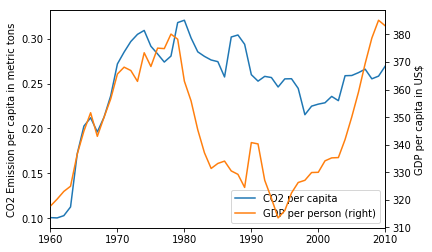

In [82]:
# plot CO2 emission and GDP for low HDI
co2_per_person_hdi_low_time.plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
gdp_per_person_hdi_low_time.plot(secondary_y=True, label="GDP per person", legend=True)
plt.ylabel('GDP per capita in US$')

Text(0,0.5,u'GDP per capita in US$')

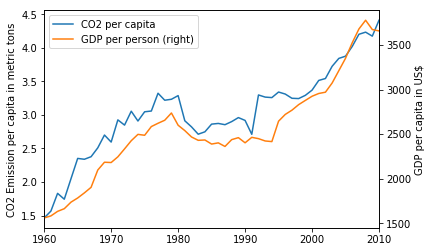

In [83]:
# plot CO2 emission and GDP for medium HDI
co2_per_person_hdi_medium_time.plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
gdp_per_person_hdi_medium_time.plot(secondary_y=True, label="GDP per person", legend=True)
plt.ylabel('GDP per capita in US$')

Text(0,0.5,u'GDP per capita in US$')

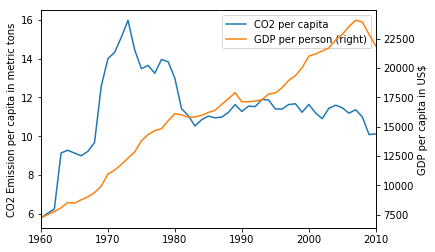

In [81]:
# plot CO2 emission and GDP for high HDI
co2_per_person_hdi_high_time.plot(label="CO2 per capita", legend=True)
plt.ylabel('CO2 Emission per capita in metric tons')
gdp_per_person_hdi_high_time.plot(secondary_y=True, label="GDP per person", legend=True)
plt.ylabel('GDP per capita in US$')

### Correlation Between CO2 Emission and GDP
determine the correlation of CO2 emission per capita and GDP per capita seperately for these groups of economies

each dot is a year

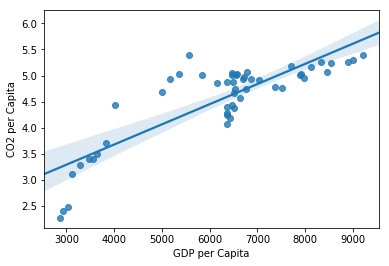

In [143]:
# regression plot all countries
sns.regplot(x='GDP per Capita', y='CO2 per Capita', data=time_data)

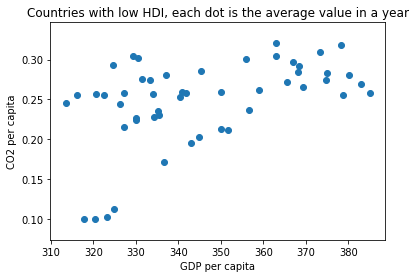

In [87]:
plt.scatter(gdp_per_person_hdi_low_time, co2_per_person_hdi_low_time)
plt.ylabel('CO2 per capita')
plt.xlabel('GDP per capita')
plt.title('Countries with low HDI, each dot is the average value in a year')
plt.show()

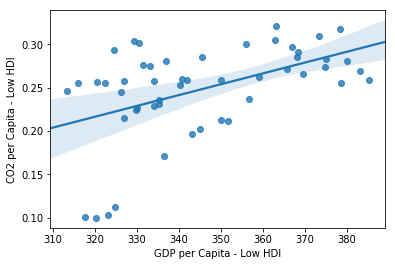

In [139]:
# regression plot countries with low hdi
sns.regplot(x='GDP per Capita - Low HDI', y='CO2 per Capita - Low HDI', data=time_data)

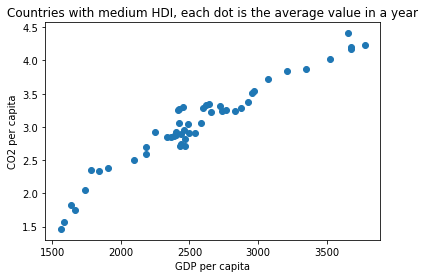

In [88]:
plt.scatter(gdp_per_person_hdi_medium_time, co2_per_person_hdi_medium_time)
plt.ylabel('CO2 per capita')
plt.xlabel('GDP per capita')
plt.title('Countries with medium HDI, each dot is the average value in a year')
plt.show()

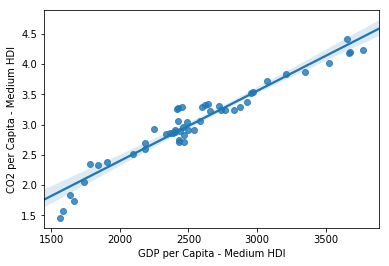

In [140]:
# regression plot countries with medium hdi
sns.regplot(x='GDP per Capita - Medium HDI', y='CO2 per Capita - Medium HDI', data=time_data)

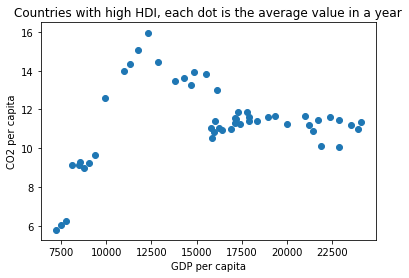

In [111]:
plt.scatter(gdp_per_person_hdi_high_time, co2_per_person_hdi_high_time)
plt.ylabel('CO2 per capita')
plt.xlabel('GDP per capita')
plt.title('Countries with high HDI, each dot is the average value in a year')
plt.show()

each dot is a country

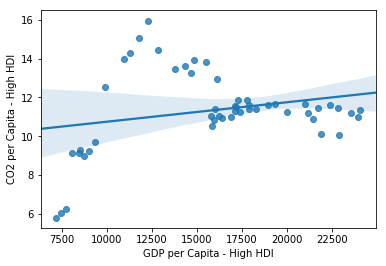

In [141]:
# regression plot countries with high hdi
sns.regplot(x='GDP per Capita - High HDI', y='CO2 per Capita - High HDI', data=time_data)

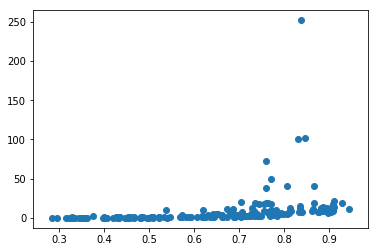

In [106]:
# inner join in order to drop countries, where one of the parameters is not available
corr_hdi_2011 = pd.DataFrame(hdi_2011).join(pd.DataFrame(co2_per_person_country),how='inner',lsuffix='_co2', rsuffix='_gdp')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(corr_hdi_2011.iloc[:,0], corr_hdi_2011.iloc[:,1])
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!